<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-AppliedComputationalMethods/blob/main/Module_B_Interpolation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module B: Interpolation**
## Sections 17.1, 17.2, 17.3

### 17.1: Interpolation Problem Statement

Assume we have a data set consisting of independent data values, $x_{i}$, and dependent data values, $y_{i}$, where $i=1, \ldots, n .$ We would like to find an estimation function $\hat{y}(x)$ such that $\hat{y}\left(x_{i}\right)=y_{i}$ for every point in our data set. This means the estimation function goes through our data points. Given a new $x *$, we can interpolate its function value using $\hat{y}(x *)$. In this context, $\hat{y}(x)$ is called an interpolation function. 

### 17.2: Linear Interpolation

##### Linear Interpolation in Python using `numpy.interp`

In [4]:
import numpy as np
import matplotlib.pyplot as plt

xp = [1, 2, 3]
fp = [3, 2, 0]
np.interp(2.5, xp, fp)
np.interp([0, 1, 1.5, 2.72, 3.14], xp, fp)
UNDEF = -99.0
np.interp(3.14, xp, fp, right=UNDEF)

-99.0

Plot an interpolant to the sine function:



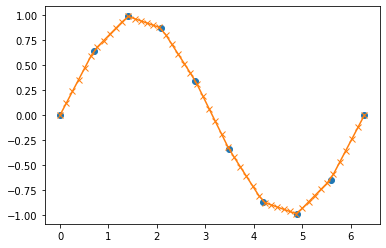

In [5]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)

plt.plot(x, y, 'o')
plt.plot(xvals, yinterp, '-x')
plt.show()

Interpolation with periodic x-coordinates:



In [6]:
x = [-180, -170, -185, 185, -10, -5, 0, 365]
xp = [190, -190, 350, -350]
fp = [5, 10, 3, 4]
np.interp(x, xp, fp, period=360)

array([7.5 , 5.  , 8.75, 6.25, 3.  , 3.25, 3.5 , 3.75])

Complex interpolation:

In [7]:
x = [1.5, 4.0]
xp = [2,3,5]
fp = [1.0j, 0, 2+3j]
np.interp(x, xp, fp)

array([0.+1.j , 1.+1.5j])

### 17.2: Cubic Spline Interpolation

#### Cubic Spline Interpolation in Python using `scipy.interpolate.CubicSpline `

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.arange(0, 2*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)
tck = interpolate.splrep(x, y, s=0)
xnew = np.arange(0, 2*np.pi, np.pi/50)
ynew = interpolate.splev(xnew, tck, der=0)

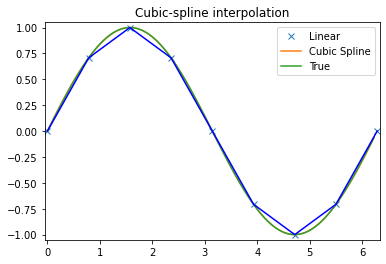

In [12]:
plt.figure()
plt.plot(x, y, 'x', xnew, ynew, xnew, np.sin(xnew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-0.05, 6.33, -1.05, 1.05])
plt.title('Cubic-spline interpolation')
plt.show()

In this example the cubic spline is used to interpolate a sampled sinusoid. You can see that the spline continuity property holds for the first and second derivatives and violates only for the third derivative.

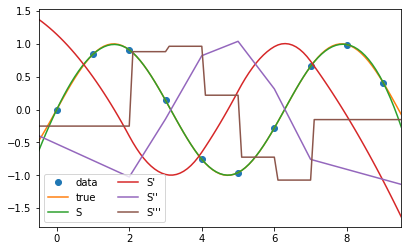

In [8]:
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.arange(10)
y = np.sin(x)
cs = CubicSpline(x, y)
xs = np.arange(-0.5, 9.6, 0.1)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, 'o', label='data')
ax.plot(xs, np.sin(xs), label='true')
ax.plot(xs, cs(xs), label="S")
ax.plot(xs, cs(xs, 1), label="S'")
ax.plot(xs, cs(xs, 2), label="S''")
ax.plot(xs, cs(xs, 3), label="S'''")
ax.set_xlim(-0.5, 9.5)
ax.legend(loc='lower left', ncol=2)
plt.show()

In the second example, the unit circle is interpolated with a spline. A periodic boundary condition is used. You can see that the first derivative values, ds/dx=0, ds/dy=1 at the periodic point (1, 0) are correctly computed. Note that a circle cannot be exactly represented by a cubic spline. To increase precision, more breakpoints would be required.

ds/dx=0.0 ds/dy=1.0


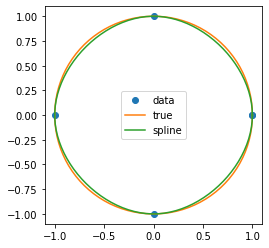

In [10]:
theta = 2 * np.pi * np.linspace(0, 1, 5)
y = np.c_[np.cos(theta), np.sin(theta)]
cs = CubicSpline(theta, y, bc_type='periodic')
print("ds/dx={:.1f} ds/dy={:.1f}".format(cs(0, 1)[0], cs(0, 1)[1]))
xs = 2 * np.pi * np.linspace(0, 1, 100)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(y[:, 0], y[:, 1], 'o', label='data')
ax.plot(np.cos(xs), np.sin(xs), label='true')
ax.plot(cs(xs)[:, 0], cs(xs)[:, 1], label='spline')
ax.axes.set_aspect('equal')
ax.legend(loc='center')
plt.show()